In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Get Data

In [ ]:
data = pd.read_csv("cleaned.csv", index_col = 0)
data

,AcresBurned,Counties,Latitude,Longitude,Started,FIPS,Temp Day One,Temp Day Two,Temp Day Three,Temp Day Four,Temp Day Five,MaxTemp Day One,MaxTemp Day Two,MaxTemp Day Three,MaxTemp Day Four,MaxTemp Day Five,MinTemp Day One,MinTemp Day Two,MinTemp Day Three,MinTemp Day Four,MinTemp Day Five,Humidity Day One,Humidity Day Two,Humidity Day Three,Humidity Day Four,Humidity Day Five,Fire
0,257314.0,Tuolumne,37.857000,-120.086000,2013-08-17 15:25:00,6109.0,74.0,78.0,79.0,79.0,80.0,83.0,87.0,88.0,88.0,89.0,50.0,52.0,52.0,52.0,54.0,38.000,33.000,34.000,35.125,33.000,True
1,30274.0,Los Angeles,34.585595,-118.423176,2013-05-30 15:28:00,6037.0,72.0,72.0,75.0,73.0,78.0,82.0,82.0,86.0,83.0,87.0,42.0,43.0,45.0,46.0,47.0,46.000,46.500,40.625,53.875,39.625,True
2,27531.0,Riverside,33.709500,-116.728850,2013-07-15 13:43:00,6065.0,82.0,77.0,79.0,82.0,84.0,88.0,82.0,84.0,88.0,90.0,66.0,65.0,65.0,66.0,68.0,34.750,51.375,48.375,27.875,27.000,True
3,27440.0,Placer,39.120000,-120.650000,2013-08-10 16:30:00,6061.0,74.0,73.0,68.0,67.0,67.0,85.0,83.0,77.0,77.0,78.0,45.0,44.0,45.0,41.0,40.0,44.625,42.750,53.125,56.250,53.000,True
4,22992.0,Fresno,37.279000,-119.318000,2013-07-22 22:15:00,6019.0,68.0,71.0,74.0,75.0,74.0,76.0,80.0,82.0,84.0,82.0,46.0,52.0,55.0,57.0,54.0,29.375,28.125,27.250,25.000,34.000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,0.0,Riverside,33.827979,-117.499619,2018-10-10 12:08:00,6065.0,70.0,69.0,77.0,65.0,71.0,74.0,74.0,85.0,67.0,78.0,63.0,63.0,69.0,64.0,64.0,59.500,56.375,48.625,73.750,64.875,False
2942,0.0,Nevada,39.409722,-121.000556,2018-06-28 15:03:04,6057.0,73.0,79.0,87.0,86.0,84.0,79.0,86.0,96.0,93.0,90.0,57.0,58.0,67.0,69.0,66.0,39.250,37.875,27.250,27.375,33.500,False
2943,0.0,Yolo,38.734634,-121.729691,2018-11-25 12:02:02,6113.0,58.0,58.0,55.0,59.0,55.0,64.0,64.0,57.0,63.0,57.0,50.0,50.0,51.0,53.0,51.0,64.250,63.625,86.000,83.875,82.875,False
2944,0.0,San Diego,33.351145,-117.403719,2018-10-22 19:20:44,6073.0,67.0,68.0,71.0,71.0,77.0,72.0,73.0,75.0,76.0,82.0,60.0,60.0,58.0,62.0,65.0,76.625,79.125,79.000,74.500,58.750,False


In [ ]:
data = data.replace({
    'Fire' : {
        True : 1,
        False : 0
    }
})

In [ ]:
all_features = list(data.columns)[6:21] + list(data.columns)[21:-1]
target = ['Fire']
all_features


['Temp Day One',
 'Temp Day Two',
 'Temp Day Three',
 'Temp Day Four',
 'Temp Day Five',
 'MaxTemp Day One',
 'MaxTemp Day Two',
 'MaxTemp Day Three',
 'MaxTemp Day Four',
 'MaxTemp Day Five',
 'MinTemp Day One',
 'MinTemp Day Two',
 'MinTemp Day Three',
 'MinTemp Day Four',
 'MinTemp Day Five',
 'Humidity Day One',
 'Humidity Day Two',
 'Humidity Day Three',
 'Humidity Day Four',
 'Humidity Day Five']

# Model Training



In [ ]:
class ModelsClass:
  def __init__(self, X, y):
    self.X = data[X].values
    self.y = data[y].values
    print(X)

  def logisticReg(self):
    X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.33)

    logreg = LogisticRegression(random_state=20191016, solver='lbfgs', max_iter= 1000)

    logreg.fit(X_train, y_train.ravel())
    self.score(X_test, y_test, logreg)

  def logisticRegNormal(self):
    scaler = StandardScaler()
    scaled_train_features = scaler.fit_transform(self.X)

    X_train, X_test, y_train, y_test = train_test_split(scaled_train_features, self.y, test_size=0.33)

    logreg = LogisticRegression(random_state=20191016, solver='lbfgs', max_iter= 1000)

    logreg.fit(X_train, y_train.ravel())
    self.score(X_test, y_test, logreg)
  
  def RandomForest(self):
    X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.33)

    random = RandomForestClassifier()

    random.fit(X_train, y_train.ravel())
    self.score(X_test, y_test, random)

  def svc(self):
    X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.33)

    svc = SVC()

    svc.fit(X_train, y_train.ravel())
    self.score(X_test, y_test, svc)

  def score(self, a, b, model):
    j = 0.000
    for i in range(50):
      j += model.score(a, b)
    j = j / 50
    print("The average score after running 50 times is : {avg:.2f}%".format(avg = (j * 100)))

In [ ]:
a = ModelsClass(all_features, target)

In [ ]:
a.logisticReg()

The average score after running 50 times is : 55.81%


*Let's try normalizing the data and see if the accuracy changes.*

In [ ]:
a.logisticRegNormal()

The average score after running 50 times is : 56.83%


**The accuracy seems to be the same. So let's maybe try a different model and see the result**

*Random Forest Classifier*

In [ ]:
a.RandomForest()

The average score after running 50 times is : 57.35%


*Support Vector Classifier*

In [ ]:
a.svc()

The average score after running 50 times is : 57.04%


**The accuracy did not change even when we tried different models. This means that we need to modify our features.** \\
*Note that if we increase the training dataset size the accuracy of models like the SVC does increase*

## Approach #1

*Instead of using all the value of the features let us look at the averages.*

In [ ]:
data['tmp avg'] = (data["Temp Day One"] + data['Temp Day Two'] + data['Temp Day Three'] + data['Temp Day Four'] 
                   + data['Temp Day Five'])/5

data['tmpMax avg'] = (data["MaxTemp Day One"] + data['MaxTemp Day Two'] + data['MaxTemp Day Three'] + data['MaxTemp Day Four'] 
                   + data['MaxTemp Day Five'])/5

data['tmpMin avg'] = (data["MinTemp Day One"] + data['MinTemp Day Two'] + data['MinTemp Day Three'] + data['MinTemp Day Four'] 
                   + data['MinTemp Day Five'])/5


In [ ]:
data['hum avg'] = (data["Humidity Day One"] + data['Humidity Day Two'] + data['Humidity Day Three'] + data['Humidity Day Four'] + data['Humidity Day Five'])/5

In [ ]:
all_features = list(data.columns)[27:-2]

In [ ]:
list(data.columns)[27: -2]

['hum avg', 'tmp avg']

In [ ]:
b = ModelsClass(all_features, target)

['hum avg', 'tmp avg']


In [ ]:
b.logisticReg()

The average score after running 50 times is : 56.42%


In [ ]:
b.logisticRegNormal()

The average score after running 50 times is : 53.44%


In [ ]:
b.RandomForest()

The average score after running 50 times is : 54.06%


In [ ]:
b.svc()

The average score after running 50 times is : 55.40%


*Using the averages does not change anything*

#**Another Model**



First we will check if our dataset is ready to process without any missing values.If there is missing values we will take care of that for the accuracy of our model.

In [ ]:
data.isna().sum()

AcresBurned               0
Counties                  0
Latitude                  0
Longitude                 0
Started                   0
FIPS                      0
Temp Day One              0
Temp Day Two              0
Temp Day Three            0
Temp Day Four             0
Temp Day Five             0
MaxTemp Day One           0
MaxTemp Day Two           0
MaxTemp Day Three         0
MaxTemp Day Four          0
MaxTemp Day Five          0
MinTemp Day One           0
MinTemp Day Two           0
MinTemp Day Three         0
MinTemp Day Four          0
MinTemp Day Five          0
Humidity Day One          0
Humidity Day Two          0
Humidity Day Three        0
Humidity Day Four         0
Humidity Day Five         0
Fire                      0
AcresBurned_is_missing    0
FIPS_is_missing           0
Counties_is_missing       0
Started_is_missing        0
dtype: int64

In [ ]:
# Turn missing "AcresBurned" into numbers
for label, content in data.items():
    # Checking for columns which are not numeric
    if not pd.api.types.is_numeric_dtype(content):
        data[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        data[label] = pd.Categorical(content).codes+1 


We will fill our missing values in "AcresBurned" Column . We will track if the value is missing with T/F. So after 
filling the column we should see AcresBurned with comments "is_missing" as False which means there is no missing.

In [ ]:
# Check if there's any null values
for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)


In [ ]:
data.isna().sum()

AcresBurned               0
Counties                  0
Latitude                  0
Longitude                 0
Started                   0
FIPS                      0
Temp Day One              0
Temp Day Two              0
Temp Day Three            0
Temp Day Four             0
Temp Day Five             0
MaxTemp Day One           0
MaxTemp Day Two           0
MaxTemp Day Three         0
MaxTemp Day Four          0
MaxTemp Day Five          0
MinTemp Day One           0
MinTemp Day Two           0
MinTemp Day Three         0
MinTemp Day Four          0
MinTemp Day Five          0
Humidity Day One          0
Humidity Day Two          0
Humidity Day Three        0
Humidity Day Four         0
Humidity Day Five         0
Fire                      0
AcresBurned_is_missing    0
FIPS_is_missing           0
Counties_is_missing       0
Started_is_missing        0
dtype: int64

Now all of our data is numeric and there are no missing values, we should be able to build a machine learning model!

In [ ]:
len(data)

2946

In [ ]:
#How many acres per county are burnt by Wildfires?

%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,random_state=42)

# Fit the model
model.fit(data.drop("AcresBurned", axis=1), data.AcresBurned)

CPU times: user 3.46 s, sys: 8.32 ms, total: 3.46 s
Wall time: 1.85 s


We have almost 2946 values so we will track how much time it will take a forestregression model.we will instantiate a random forest model with random state 42. It takes about 1.85s to go through the model which took fairly less time considering the data cleaning that we have done in out dataset.In the regression model, the default score value is upto R^2 which is 1 .  When we scored the model it came 0.906...


In [ ]:
# Score the model
model.score(data.drop("AcresBurned", axis=1), data.AcresBurned)

0.9061603278515105

In [ ]:
# lets make our training set (Split data into X and y)
X = data.drop("Fire", axis=1)

y = data["Fire"]

In [ ]:
X

,AcresBurned,Counties,Latitude,Longitude,Started,FIPS,Temp Day One,Temp Day Two,Temp Day Three,Temp Day Four,Temp Day Five,MaxTemp Day One,MaxTemp Day Two,MaxTemp Day Three,MaxTemp Day Four,MaxTemp Day Five,MinTemp Day One,MinTemp Day Two,MinTemp Day Three,MinTemp Day Four,MinTemp Day Five,Humidity Day One,Humidity Day Two,Humidity Day Three,Humidity Day Four,Humidity Day Five,AcresBurned_is_missing,FIPS_is_missing,Counties_is_missing,Started_is_missing
0,257314.0,56,37.857000,-120.086000,293,6109.0,74.0,78.0,79.0,79.0,80.0,83.0,87.0,88.0,88.0,89.0,50.0,52.0,52.0,52.0,54.0,38.000,33.000,34.000,35.125,33.000,False,False,False,False
1,30274.0,18,34.585595,-118.423176,187,6037.0,72.0,72.0,75.0,73.0,78.0,82.0,82.0,86.0,83.0,87.0,42.0,43.0,45.0,46.0,47.0,46.000,46.500,40.625,53.875,39.625,False,False,False,False
2,27531.0,33,33.709500,-116.728850,247,6065.0,82.0,77.0,79.0,82.0,84.0,88.0,82.0,84.0,88.0,90.0,66.0,65.0,65.0,66.0,68.0,34.750,51.375,48.375,27.875,27.000,False,False,False,False
3,27440.0,31,39.120000,-120.650000,280,6061.0,74.0,73.0,68.0,67.0,67.0,85.0,83.0,77.0,77.0,78.0,45.0,44.0,45.0,41.0,40.0,44.625,42.750,53.125,56.250,53.000,False,False,False,False
4,22992.0,10,37.279000,-119.318000,255,6019.0,68.0,71.0,74.0,75.0,74.0,76.0,80.0,82.0,84.0,82.0,46.0,52.0,55.0,57.0,54.0,29.375,28.125,27.250,25.000,34.000,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,0.0,33,33.827979,-117.499619,2547,6065.0,70.0,69.0,77.0,65.0,71.0,74.0,74.0,85.0,67.0,78.0,63.0,63.0,69.0,64.0,64.0,59.500,56.375,48.625,73.750,64.875,False,False,False,False
2942,0.0,29,39.409722,-121.000556,2221,6057.0,73.0,79.0,87.0,86.0,84.0,79.0,86.0,96.0,93.0,90.0,57.0,58.0,67.0,69.0,66.0,39.250,37.875,27.250,27.375,33.500,False,False,False,False
2943,0.0,58,38.734634,-121.729691,2616,6113.0,58.0,58.0,55.0,59.0,55.0,64.0,64.0,57.0,63.0,57.0,50.0,50.0,51.0,53.0,51.0,64.250,63.625,86.000,83.875,82.875,False,False,False,False
2944,0.0,37,33.351145,-117.403719,2573,6073.0,67.0,68.0,71.0,71.0,77.0,72.0,73.0,75.0,76.0,82.0,60.0,60.0,58.0,62.0,65.0,76.625,79.125,79.000,74.500,58.750,False,False,False,False


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2941    0
2942    0
2943    0
2944    0
2945    0
Name: Fire, Length: 2946, dtype: int64

In [ ]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [ ]:
# Put all our models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
%%time
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


CPU times: user 755 ms, sys: 200 ms, total: 955 ms
Wall time: 729 ms


Above we have got our data split into training and test sets, it's time to build a machine learning model to find the patterns on the training set and we will use the patterns on the test set.
We have looked at three models 


*   Logistic Regression
*   K-Nearest Neighbours Classifier
*   Random Forest Classifier   

From the result we can see that the Random Forest Classifier has got the highest score.We can Create a visulaization to investigate the result


#**Model Comparison**

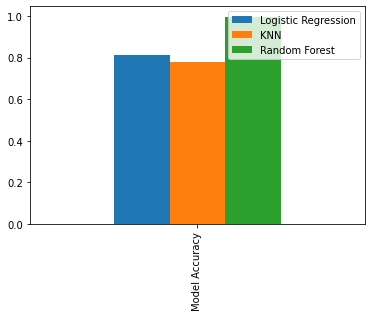

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["Model Accuracy"])
model_compare.plot.bar();


Now we've got a  model running and Let's look at tuning methods, I'd like to quickly revisit the purpose of splitting our data into training, validation, and test data

In [ ]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores

[1.0,
 0.8828522920203735,
 0.8866723259762309,
 0.8531409168081494,
 0.8620543293718166,
 0.833616298811545,
 0.8404074702886248,
 0.8255517826825127,
 0.8297962648556876,
 0.8183361629881154,
 0.815365025466893,
 0.816213921901528,
 0.8149405772495756,
 0.8030560271646859,
 0.8026315789473685,
 0.7988115449915111,
 0.8056027164685908,
 0.7971137521222411,
 0.799660441426146,
 0.7954159592529711]

In [ ]:
test_scores

[0.7898305084745763,
 0.788135593220339,
 0.7830508474576271,
 0.7762711864406779,
 0.7796610169491526,
 0.7915254237288135,
 0.7949152542372881,
 0.7966101694915254,
 0.7983050847457627,
 0.7830508474576271,
 0.7813559322033898,
 0.7728813559322034,
 0.7728813559322034,
 0.7661016949152543,
 0.7677966101694915,
 0.764406779661017,
 0.7745762711864407,
 0.7661016949152543,
 0.7762711864406779,
 0.7762711864406779]

Maximum KNN score on the test data: 79.83%


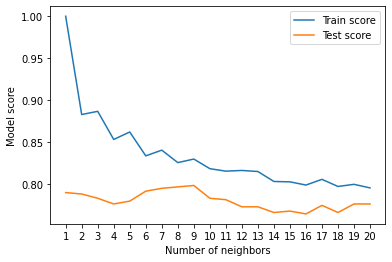

In [ ]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

We're going to tune:
**RandomForestClassifier()** which got the highest score. In order to acheive that we are going to get hyperparameter grids setup for our best scored model which is **RandomForestClassifier()**and tune it using RandomizedSearchCV.

In [ ]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

#**Evaluating our tuned ML model using Confusion Matrix**

In order To make comparisons and evaluate our trained model, we will look at confusion matrix


In [ ]:
|